In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import pandas as pd
import numpy as np
import math
import warnings; warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go 
import scipy.stats as stats
from scipy import stats

from scipy.stats import mannwhitneyu, norm, t, nct, rankdata, ttest_ind

In [3]:
df_train=pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_train.head().style.set_properties(**{"background-color": "#98FB98","color": "black", "border-color": "black"})

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000000,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.000000,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003.000000,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000000,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.000000,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000000,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.000000,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.000000,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000000,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.000000,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000000,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.000000,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.000000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


In [4]:
df_test=pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
df_submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [6]:
df_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [7]:
%config Completer.use_jedi = False

In [8]:
# Not reading file for some reason
#df_text = pd.read_csv('../input/house-prices-advanced-regression-techniques/data_description.txt')

In [9]:

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
target = 'SalePrice'
features = [feature for feature in df_train.columns if feature not in  ['SalePrice','Id','id']]
numerical = [feature for feature in features if df_train[feature].dtypes != 'O']
categorical =[feature for feature in features if feature not in numerical]




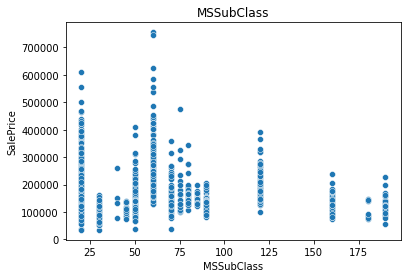

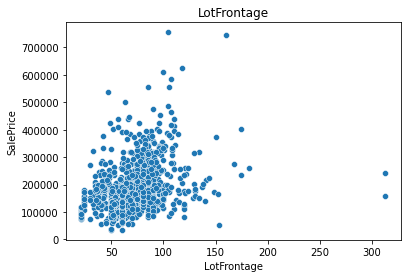

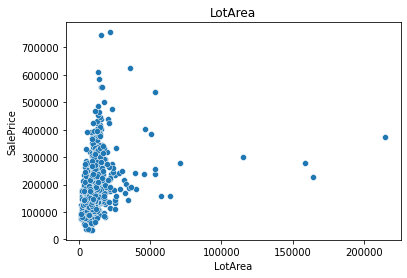

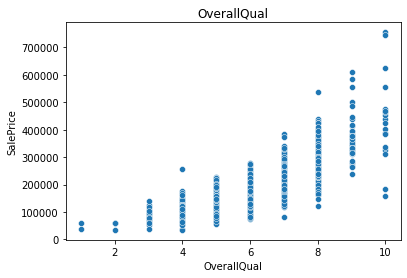

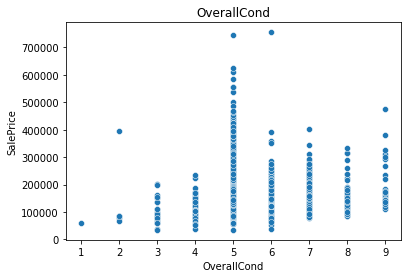

In [11]:
#Scatterplots to understand the shape of numerical data, first 5 columns
for feature in numerical[:5]:
    sns.scatterplot(x=df_train[feature], y = df_train.SalePrice ).set_title(feature)
    plt.show()
    
    

<AxesSubplot:>

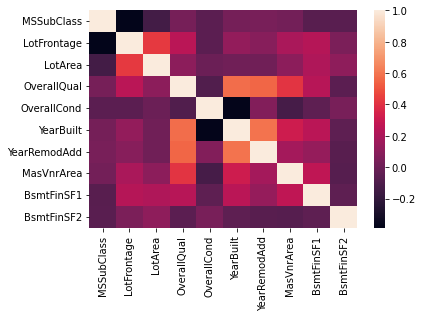

In [12]:
# Need to check the features for correlation if we use linear regression and some feature have significant correlation, 
#i.e. ove 0.6, like year built etc.
sns.heatmap(df_train.loc[:,numerical[:10]].corr())

In [13]:
# Need to fill in the empty rows
for feature in numerical:
    median = df_train[feature].median()
    df_train[feature] = df_train[feature].fillna(median)
    df_test[feature] = df_test[feature].fillna(median)
        

In [14]:
for feature in categorical:
    df_train[feature] = df_train[feature].fillna('Null')
    df_test[feature] = df_test[feature].fillna('Null')
    

Id


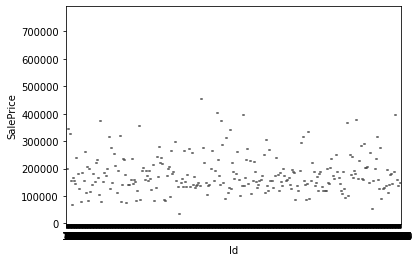

MSZoning


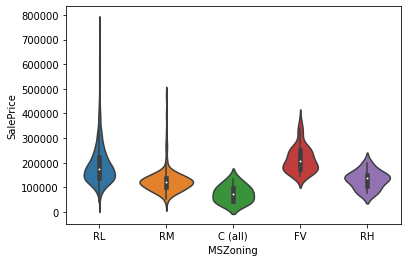

Street


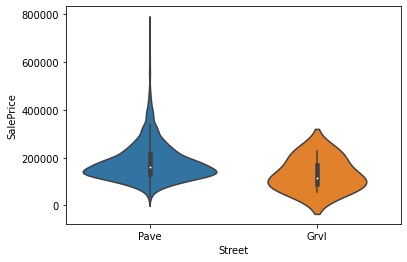

Alley


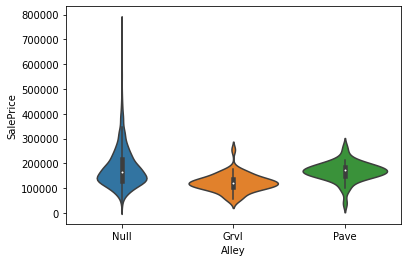

LotShape


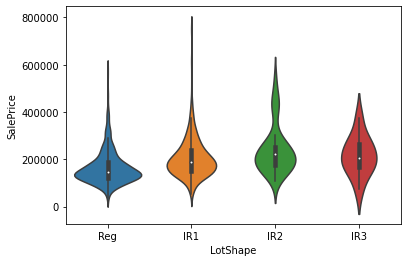

LandContour


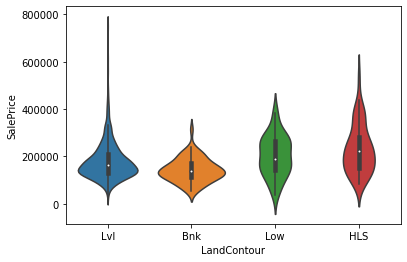

In [15]:
counter = 0
for feature in df_train.columns:
    if feature not in numerical and counter <6:# and type(feature)!='NoneType':
        print (feature)
        sns.violinplot(x=feature, y='SalePrice', data=df_train)
        counter+=1
        plt.show()

In [16]:
from catboost import CatBoostRegressor

In [17]:
y_train= df_train[target]
x_train = df_train[features]
x_test = df_test[features] 

In [18]:
x_train_train, x_train_test,y_train_train, y_train_test = train_test_split(x_train,y_train,test_size=0.25) 

180921.19589041095
163000.0
79442.50288288663


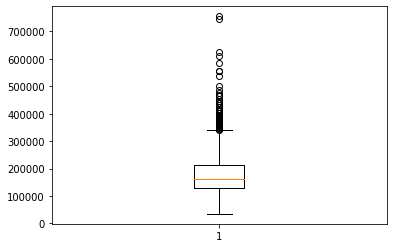

In [19]:
plt.boxplot(df_train[target])
print (df_train[target].mean())
print (df_train[target].median())
print (df_train[target].std())

In [20]:
model = CatBoostRegressor(loss_function='RMSE', cat_features=categorical)
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
#model.grid_search(grid, x_train_train)

In [21]:
#Lets first train the data on the training subset and see the model metrics
model.fit(x_train_train, y_train_train, silent=True)

In [22]:
# The parameters are acceptable, where the RMSE is 29K which is okay for mean price of 180K and median of 163K with std 79K
pred = model.predict(x_train_test)
rmse = (np.sqrt(mean_squared_error(y_train_test, pred)))
r2 = r2_score(y_train_test, pred)
print('Testing performance')
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))


Testing performance
RMSE: 29305.56
R2: 0.89


In [23]:
# Now we can let the final model learn 
model.fit(x_train, y_train, silent=True)


In [24]:
y_test_pred =  model.predict(x_test)

In [25]:
y_test_pred[:10]

array([118570.3730162 , 164850.57332839, 187181.35022493, 196319.40122146,
       193695.29378423, 171600.31440006, 175205.04437449, 168099.62227749,
       189120.11463287, 126012.86966887])

In [26]:
x_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Null,Reg,Lvl,AllPub,Inside,...,120,0,Null,MnPrv,Null,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,Null,IR1,Lvl,AllPub,Corner,...,0,0,Null,Null,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,Null,IR1,Lvl,AllPub,Inside,...,0,0,Null,MnPrv,Null,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,Null,IR1,Lvl,AllPub,Inside,...,0,0,Null,Null,Null,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,Null,IR1,HLS,AllPub,Inside,...,144,0,Null,Null,Null,0,1,2010,WD,Normal


In [27]:
submission_file = pd.DataFrame({'Id':df_test['Id'],'SalePrice':y_test_pred })
submission_file.head()

,Id,SalePrice
0,1461,118570.373016
1,1462,164850.573328
2,1463,187181.350225
3,1464,196319.401221
4,1465,193695.293784


In [28]:
submission_file.to_csv("submission.csv",index = False)
